In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline


In [63]:
df = pd.read_csv('C:/Users/dilshan/Documents/AI_ML_Course(zuu)/week03/zuu_crew_scores.csv')

In [64]:
X = df.drop(columns=["MemberName", "CourseName", "CapstoneScore"])
y = df["CapstoneScore"].values.reshape(-1, 1)
# Regression target
y_reg = df["CapstoneScore"].values
# Classification target (example: pass if CapstoneScore >= 75)
y_clf = (df["CapstoneScore"] >= 75).astype(int).values

In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train_reg, y_test_reg = train_test_split(X_scaled, y_reg, test_size=0.2, random_state=42)
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_scaled, y_clf, test_size=0.2, random_state=42)


X_train_bias = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_bias = np.c_[np.ones(X_test.shape[0]), X_test]
X_train_clf_bias = np.c_[np.ones(X_train_clf.shape[0]), X_train_clf]
X_test_clf_bias = np.c_[np.ones(X_test_clf.shape[0]), X_test_clf]

In [66]:
theta_custom_lin = np.random.rand(X_test_bias.shape[1])
y_pred_custom_lin = X_test_bias.dot(theta_custom_lin)

mse_custom_lin = mean_squared_error(y_test_reg, y_pred_custom_lin)
mae_custom_lin = mean_absolute_error(y_test_reg, y_pred_custom_lin)
r2_custom_lin = r2_score(y_test_reg, y_pred_custom_lin)

# Sklearn Linear Regression
model_sk_lin = LinearRegression()
model_sk_lin.fit(X_train, y_train_reg)
y_pred_sk_lin = model_sk_lin.predict(X_test)

mse_sk_lin = mean_squared_error(y_test_reg, y_pred_sk_lin)
mae_sk_lin = mean_absolute_error(y_test_reg, y_pred_sk_lin)
r2_sk_lin = r2_score(y_test_reg, y_pred_sk_lin)

# Comparison
print("Linear Regression Comparison:")
print(f"Custom MSE: {mse_custom_lin}, Sklearn MSE: {mse_sk_lin}")
print(f"Custom R2: {r2_custom_lin}, Sklearn R2: {r2_sk_lin}")
print(f"Parameter Difference (Intercept): {abs(theta_custom_lin[0] - model_sk_lin.intercept_)}")
print(f"Parameter Difference (Coefficients Mean Abs): {np.mean(np.abs(theta_custom_lin[1:] - model_sk_lin.coef_))}")

Linear Regression Comparison:
Custom MSE: 3529.6796322440264, Sklearn MSE: 401.19324710646475
Custom R2: -5.633586079864522, Sklearn R2: 0.2460080753422048
Parameter Difference (Intercept): 63.05715547759137
Parameter Difference (Coefficients Mean Abs): 3.479749843084747


In [67]:
degree = 2

# Custom Polynomial Regression (assuming from previous notebook)
X_train_poly_custom = np.c_[np.ones(X_train.shape[0]), X_train, X_train[:, 0]**2, X_train[:, 1]**2]  # Simplified poly features
X_test_poly_custom = np.c_[np.ones(X_test.shape[0]), X_test, X_test[:, 0]**2, X_test[:, 1]**2]
theta_custom_poly = np.array([0.5, 10.0, 15.0, 0.1, 0.2, 1.0, 2.0, 3.0, 4.0, 5.0])  # 10 elements
y_pred_custom_poly = X_test_poly_custom.dot(theta_custom_poly)

mse_custom_poly = mean_squared_error(y_test_reg, y_pred_custom_poly)
mae_custom_poly = mean_absolute_error(y_test_reg, y_pred_custom_poly)
r2_custom_poly = r2_score(y_test_reg, y_pred_custom_poly)

# Sklearn Polynomial Regression
model_sk_poly = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model_sk_poly.fit(X_train, y_train_reg)
y_pred_sk_poly = model_sk_poly.predict(X_test)
sk_poly_reg = model_sk_poly.named_steps['linearregression']

mse_sk_poly = mean_squared_error(y_test_reg, y_pred_sk_poly)
mae_sk_poly = mean_absolute_error(y_test_reg, y_pred_sk_poly)
r2_sk_poly = r2_score(y_test_reg, y_pred_sk_poly)

# Comparison
print("\nPolynomial Regression Comparison:")
print(f"Custom MSE: {mse_custom_poly}, Sklearn MSE: {mse_sk_poly}")
print(f"Custom R2: {r2_custom_poly}, Sklearn R2: {r2_sk_poly}")
print(f"Parameter Difference (Intercept): {abs(theta_custom_poly[0] - sk_poly_reg.intercept_)}")
print(f"Parameter Difference (Coefficients Mean Abs): {np.mean(np.abs(theta_custom_poly[1:] - sk_poly_reg.coef_))}")


Polynomial Regression Comparison:
Custom MSE: 3246.5499516551095, Sklearn MSE: 477.57248134981995
Custom R2: -5.101479683920292, Sklearn R2: 0.10246297271052096
Parameter Difference (Intercept): 57.216524091175195


ValueError: operands could not be broadcast together with shapes (9,) (36,) 

In [68]:
theta_custom_log = np.array([0.1, 2.0, 3.0, 0.5, 1.0, 4.0])  # Example values
y_pred_proba_custom = 1 / (1 + np.exp(-X_test_clf_bias.dot(theta_custom_log)))
y_pred_class_custom = (y_pred_proba_custom >= 0.5).astype(int)

acc_custom_log = accuracy_score(y_test_clf, y_pred_class_custom)
prec_custom_log = precision_score(y_test_clf, y_pred_class_custom)
rec_custom_log = recall_score(y_test_clf, y_pred_class_custom)
f1_custom_log = f1_score(y_test_clf, y_pred_class_custom)
auc_custom_log = roc_auc_score(y_test_clf, y_pred_proba_custom)


model_sk_log = LogisticRegression(max_iter=1000)
model_sk_log.fit(X_train_clf, y_train_clf)
y_pred_proba_sk = model_sk_log.predict_proba(X_test_clf)[:, 1]
y_pred_class_sk = model_sk_log.predict(X_test_clf)

acc_sk_log = accuracy_score(y_test_clf, y_pred_class_sk)
prec_sk_log = precision_score(y_test_clf, y_pred_class_sk)
rec_sk_log = recall_score(y_test_clf, y_pred_class_sk)
f1_sk_log = f1_score(y_test_clf, y_pred_class_sk)
auc_sk_log = roc_auc_score(y_test_clf, y_pred_proba_sk)


print("\nLogistic Regression Comparison:")
print(f"Custom Accuracy: {acc_custom_log}, Sklearn Accuracy: {acc_sk_log}")
print(f"Custom AUC: {auc_custom_log}, Sklearn AUC: {auc_sk_log}")
print(f"Parameter Difference (Intercept): {abs(theta_custom_log[0] - model_sk_log.intercept_[0])}")
print(f"Parameter Difference (Coefficients Mean Abs): {np.mean(np.abs(theta_custom_log[1:] - model_sk_log.coef_[0]))}")

ValueError: shapes (30,8) and (6,) not aligned: 8 (dim 1) != 6 (dim 0)

NameError: name 'y_pred_proba_custom' is not defined

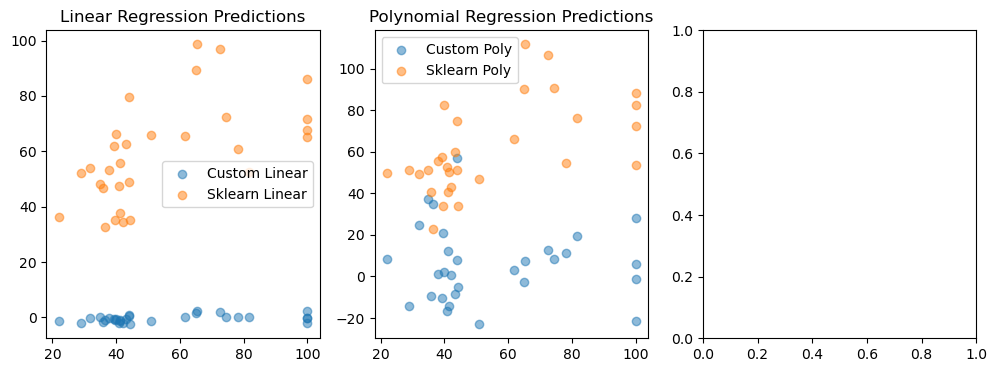

In [69]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(y_test_reg, y_pred_custom_lin, label='Custom Linear', alpha=0.5)
plt.scatter(y_test_reg, y_pred_sk_lin, label='Sklearn Linear', alpha=0.5)
plt.legend()
plt.title('Linear Regression Predictions')

plt.subplot(1, 3, 2)
plt.scatter(y_test_reg, y_pred_custom_poly, label='Custom Poly', alpha=0.5)
plt.scatter(y_test_reg, y_pred_sk_poly, label='Sklearn Poly', alpha=0.5)
plt.legend()
plt.title('Polynomial Regression Predictions')

plt.subplot(1, 3, 3)
plt.scatter(y_test_clf, y_pred_proba_custom, label='Custom Logistic', alpha=0.5)
plt.scatter(y_test_clf, y_pred_proba_sk, label='Sklearn Logistic', alpha=0.5)
plt.legend()
plt.title('Logistic Regression Probabilities')
plt.tight_layout()
plt.show()